<a href="https://colab.research.google.com/github/nt5504289-oss/house-price-project/blob/main/house_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [3]:
import pandas as pd
df=pd.read_csv("/AmesHousing_engineered.csv")
display(df.head())

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,P,210,62,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,0,120,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,0,0,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,0,0,3,2010,WD,Normal,189900


In [4]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,P,210,62,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,140,0,0,120,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,393,36,0,0,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,212,34,0,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2930 non-null   int64  
 1   MS Zoning       2930 non-null   object 
 2   Lot Frontage    2930 non-null   float64
 3   Lot Area        2930 non-null   int64  
 4   Street          2930 non-null   object 
 5   Lot Shape       2930 non-null   object 
 6   Land Contour    2930 non-null   object 
 7   Utilities       2930 non-null   object 
 8   Lot Config      2930 non-null   object 
 9   Land Slope      2930 non-null   object 
 10  Neighborhood    2930 non-null   object 
 11  Condition 1     2930 non-null   object 
 12  Condition 2     2930 non-null   object 
 13  Bldg Type       2930 non-null   object 
 14  House Style     2930 non-null   object 
 15  Overall Qual    2930 non-null   int64  
 16  Overall Cond    2930 non-null   int64  
 17  Year Built      2930 non-null   i

In [7]:
df.shape

(2930, 68)

In [8]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,...,Fireplaces,Garage Yr Blt,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,442.604778,559.230717,...,0.599317,1978.179522,1.766894,93.751877,47.533447,23.011604,16.002048,6.216041,2007.790444,180796.060068
std,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,455.515036,439.422500,...,0.647921,24.826620,0.760449,126.361562,67.483400,64.139059,56.087370,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,219.000000,...,0.000000,1962.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,466.000000,...,1.000000,1979.000000,2.000000,0.000000,27.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,801.750000,...,1.000000,2001.000000,2.000000,168.000000,70.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,...,4.000000,2207.000000,5.000000,1424.000000,742.000000,1012.000000,576.000000,12.000000,2010.000000,755000.000000


In [10]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF'

In [14]:
df.isnull().sum()

,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
Lot Area,0
Street,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
import matplotlib.pyplot as plt

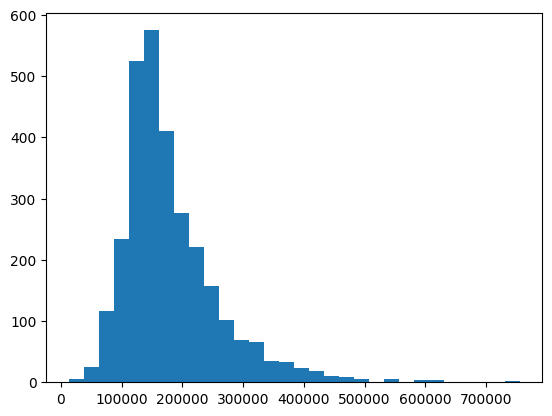

In [17]:
import matplotlib.pyplot as plt
plt.hist(df["SalePrice"],bins=30)
plt.show()

In [22]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Align columns - this is crucial after one-hot encoding to ensure both train and test have the same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [27]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(x_test)

In [38]:
print(mean_squared_error(y_test,y_pred))
print(model.score(x_test,y_test))
print(r2_score(y_test,y_pred))

287580189957.09985
-34.86884574128633
-34.86884574128633


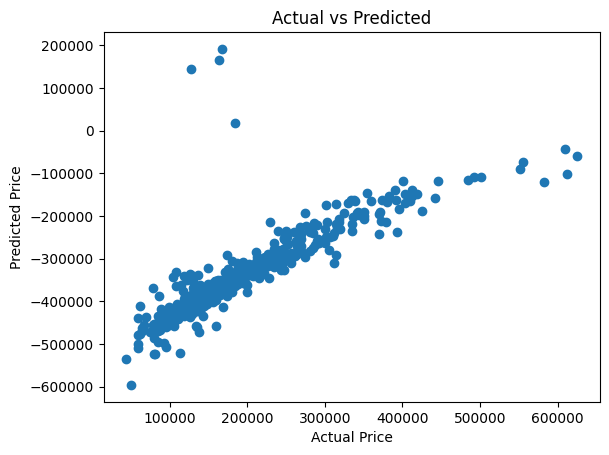

In [39]:


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()